unprivileged    167805
privileged      151990
Name: SexPriv, dtype: int64 

unprivileged    242473
privileged       77322
Name: AgePriv, dtype: int64 

privileged      245212
unprivileged     74583
Name: RacePriv, dtype: int64

					        NORMAL

			------------------DISPARATE IMPACT-------------------

*********Heart Disease*********

0.9330532463275826
0.8938153825909599
Disparate Impact, Sex vs. Heart Disease:  1.0438992934121152 

0.8903465540493168
0.9898476500866507
Disparate Impact, Age vs. Heart Disease:  0.8994783732338774 

0.9347572503117333
0.9082141167642693
Disparate Impact, Race vs. Heart Disease:  1.0292256341951942 


*********Stroke*********

0.9616995917880874
0.9628791367853148
Disparate Impact, Sex vs. Stroke:  0.9987749812492922 

0.9521843669192034
0.9938568583326867
Disparate Impact, Age vs. Stroke:  0.9580699262030612 

0.962659050990172
0.9621388839045397
Disparate Impact, Race vs. Stroke:  1.0005406361746043



			------------------STATISTICAL PARITY-------

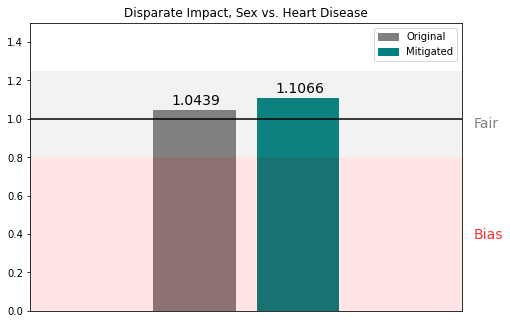

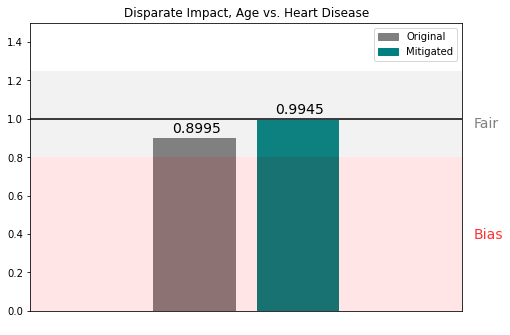

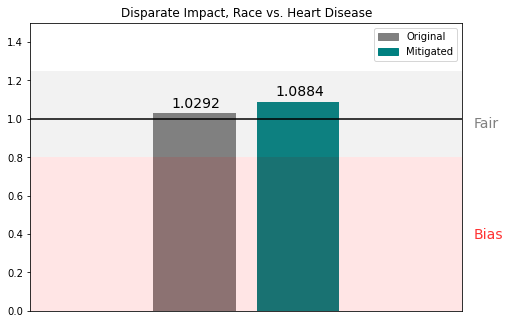

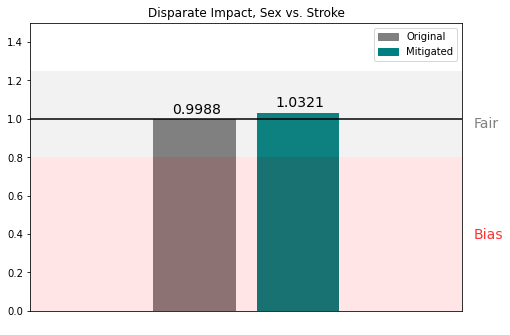

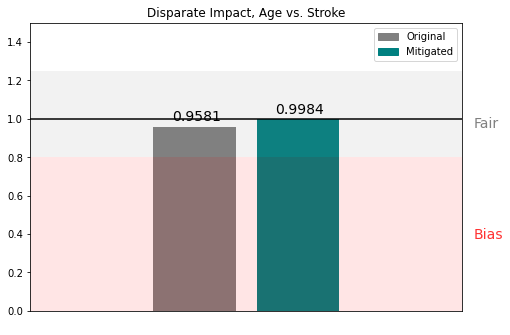

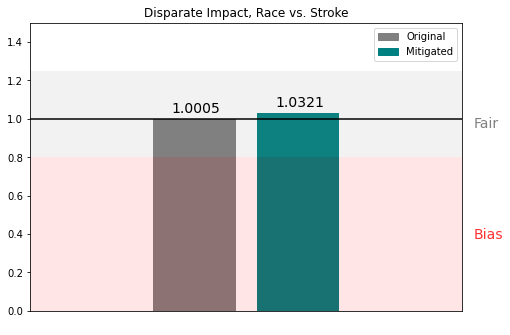

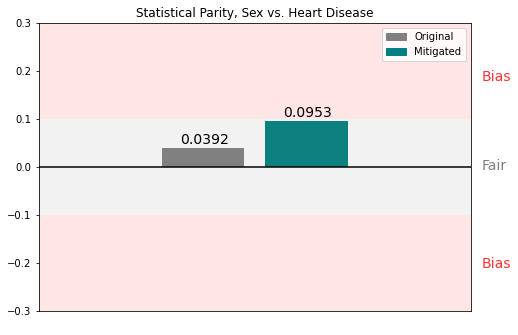

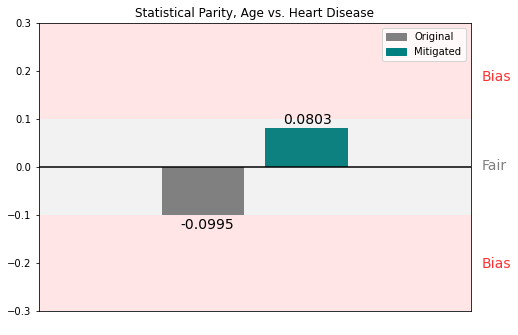

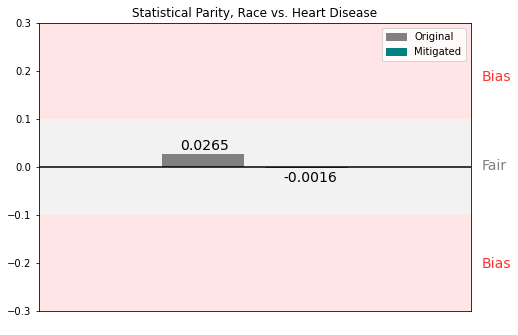

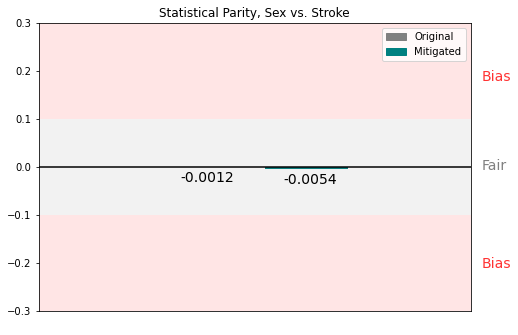

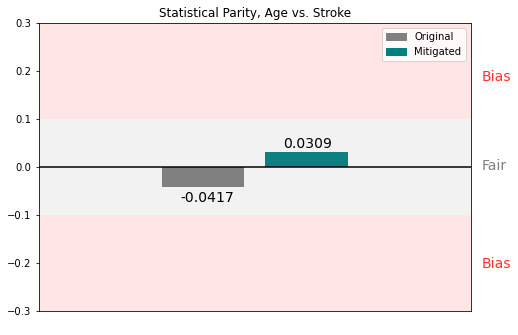

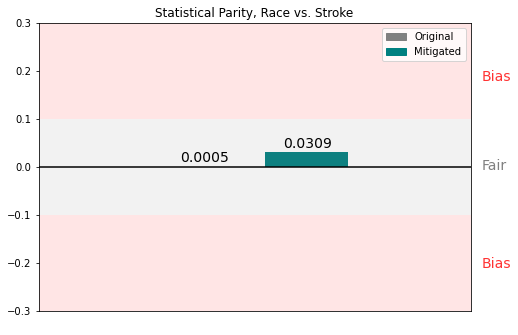

In [3]:
import pandas as pd
import numpy as np
import statistics
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle

pd.set_option('display.max_columns', None)
df = pd.read_csv('heart_2020_cleaned.csv', delimiter=',')


#Create columns with privileged and unprivileged values for sex, race, and age protected classes
conditions = [
    (df['Sex'] == 'Male'),
    (df['Sex'] == 'Female'),
    ]
values = ['privileged', 'unprivileged']
df['SexPriv'] = np.select(conditions, values)

     
conditions = [
    (df['AgeCategory'] == '18-24'),
    (df['AgeCategory'] == '25-29'),
    (df['AgeCategory'] == '30-34'),
    (df['AgeCategory'] == '35-39'),
    (df['AgeCategory'] == '40-44'),
    (df['AgeCategory'] == '45-49'),
    (df['AgeCategory'] == '50-54'),
    (df['AgeCategory'] == '55-59'),
    (df['AgeCategory'] == '60-64'),
    (df['AgeCategory'] == '65-69'),
    (df['AgeCategory'] == '70-74'),
    (df['AgeCategory'] == '75-79' ),
    (df['AgeCategory'] == '80 or older'),
    ]
values = ['privileged', 'privileged', 'privileged', 'privileged', 'unprivileged', 
          'unprivileged', 'unprivileged', 'unprivileged', 'unprivileged', 
          'unprivileged', 'unprivileged', 'unprivileged', 'unprivileged']
df['AgePriv'] = np.select(conditions, values)


conditions = [
    (df['Race'] == 'White'),
    (df['Race'] == 'Black'),
    (df['Race'] == 'Asian'),
    (df['Race'] == 'American Indian/Alaskan Native'),
    (df['Race'] == 'Hispanic'),
    (df['Race'] == 'Other'),
    ]
values = ['privileged', 'unprivileged', 'unprivileged', 'unprivileged', 'unprivileged', 'unprivileged']
df['RacePriv'] = np.select(conditions, values)


#Show number of privileged and unprivileged people in each protected class column
print(df['SexPriv'].value_counts(), '\n')
print(df['AgePriv'].value_counts(), '\n')
print(df['RacePriv'].value_counts())


#Create columns with threshold of favorable or unfavorable outcomes for each protected class
#Heart Disease and Stroke columns were used as the threshold. 'No' = favorable, 'Yes' = Unfavorable

conditions = [
    (df['HeartDisease'] == 'No') & ((df['Sex'] == 'Male') | (df['Sex'] == 'Female')),
    (df['HeartDisease'] == 'Yes') & ((df['Sex'] == 'Male') | (df['Sex'] == 'Female'))
    ]
values = ['No', 'Yes']
df['SexHeart'] = np.select(conditions, values)


conditions = [
    (df['HeartDisease'] == 'No') & ((df['AgeCategory'] == '18-24') | (df['AgeCategory'] == '25-29') | (df['AgeCategory'] == '30-34') | (df['AgeCategory'] == '35-39') | (df['AgeCategory'] == '40-44') | (df['AgeCategory'] == '45-49') | (df['AgeCategory'] == '50-54') | (df['AgeCategory'] == '55-59') | (df['AgeCategory'] == '60-64') | (df['AgeCategory'] == '65-69')  | (df['AgeCategory'] == '70-74')  | (df['AgeCategory'] == '75-79')  | (df['AgeCategory'] == '80 or older')),
    (df['HeartDisease'] == 'Yes') & ((df['AgeCategory'] == '18-24') | (df['AgeCategory'] == '25-29') | (df['AgeCategory'] == '30-34') | (df['AgeCategory'] == '35-39') | (df['AgeCategory'] == '40-44') | (df['AgeCategory'] == '45-49') | (df['AgeCategory'] == '50-54') | (df['AgeCategory'] == '55-59') | (df['AgeCategory'] == '60-64') | (df['AgeCategory'] == '65-69')  | (df['AgeCategory'] == '70-74')  | (df['AgeCategory'] == '75-79')  | (df['AgeCategory'] == '80 or older')),    
    ]
values = ['No', 'Yes']
df['AgeHeart'] = np.select(conditions, values)


conditions = [
    (df['HeartDisease'] == 'No') & ((df['Race'] == 'White') | (df['Race'] == 'Black') | (df['Race'] == 'Asian') | (df['Race'] == 'American Indian/Alaskan Native') | (df['Race'] == 'Hispanic') | (df['Race'] == 'Other')),
    (df['HeartDisease'] == 'Yes') & ((df['Race'] == 'White') | (df['Race'] == 'Black') | (df['Race'] == 'Asian') | (df['Race'] == 'American Indian/Alaskan Native') | (df['Race'] == 'Hispanic') | (df['Race'] == 'Other')),    
    ]
values = ['No', 'Yes']
df['RaceHeart'] = np.select(conditions, values)


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


conditions = [
    (df['Stroke'] == 'No') & (df['Sex'] == 'Male'),
    (df['Stroke'] == 'Yes') & (df['Sex'] == 'Male'),
    (df['Stroke'] == 'No') & (df['Sex'] == 'Female'),
    (df['Stroke'] == 'Yes') & (df['Sex'] == 'Female')
    ]
values = ['No', 'Yes', 'No', 'Yes']
df['SexStroke'] = np.select(conditions, values)


conditions = [
    (df['Stroke'] == 'No') & ((df['AgeCategory'] == '18-24') | (df['AgeCategory'] == '25-29') | (df['AgeCategory'] == '30-34') | (df['AgeCategory'] == '35-39') | (df['AgeCategory'] == '40-44') | (df['AgeCategory'] == '45-49') | (df['AgeCategory'] == '50-54') | (df['AgeCategory'] == '55-59') | (df['AgeCategory'] == '60-64') | (df['AgeCategory'] == '65-69')  | (df['AgeCategory'] == '70-74')  | (df['AgeCategory'] == '75-79')  | (df['AgeCategory'] == '80 or older')),
    (df['Stroke'] == 'Yes') & ((df['AgeCategory'] == '18-24') | (df['AgeCategory'] == '25-29') | (df['AgeCategory'] == '30-34') | (df['AgeCategory'] == '35-39') | (df['AgeCategory'] == '40-44') | (df['AgeCategory'] == '45-49') | (df['AgeCategory'] == '50-54') | (df['AgeCategory'] == '55-59') | (df['AgeCategory'] == '60-64') | (df['AgeCategory'] == '65-69')  | (df['AgeCategory'] == '70-74')  | (df['AgeCategory'] == '75-79')  | (df['AgeCategory'] == '80 or older')),    
    ]
values = ['No', 'Yes']
df['AgeStroke'] = np.select(conditions, values)


conditions = [
    (df['Stroke'] == 'No') & ((df['Race'] == 'White') | (df['Race'] == 'Black') | (df['Race'] == 'Asian') | (df['Race'] == 'American Indian/Alaskan Native') | (df['Race'] == 'Hispanic') | (df['Race'] == 'Other')),
    (df['Stroke'] == 'Yes') & ((df['Race'] == 'White') | (df['Race'] == 'Black') | (df['Race'] == 'Asian') | (df['Race'] == 'American Indian/Alaskan Native') | (df['Race'] == 'Hispanic') | (df['Race'] == 'Other')),    
    ]
values = ['No', 'Yes']
df['RaceStroke'] = np.select(conditions, values)




#Calculate fairness metrics (Disparate Impact and Statistical Parity) using favorable outcomes
#for members of the privileged and unprivileged groups in each column

########################      DISPARATE IMPACT         ##############################

##########     HEART DISEASE    ############

print('\n\t\t\t\t\t        NORMAL\n')
print('\t\t\t------------------DISPARATE IMPACT-------------------\n')
print('*********Heart Disease*********\n')

priv = df[df['SexPriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['SexPriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['SexHeart'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['SexHeart'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Sex vs. Heart Disease: ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['AgePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['AgePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['AgeHeart'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['AgeHeart'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Age vs. Heart Disease: ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['RacePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['RacePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['RaceHeart'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['RaceHeart'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Race vs. Heart Disease: ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

##########     STROKE    ############

print('\n*********Stroke*********\n')

priv = df[df['SexPriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['SexPriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['SexStroke'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['SexStroke'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Sex vs. Stroke: ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['AgePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['AgePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['AgeStroke'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['AgeStroke'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Age vs. Stroke: ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['RacePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['RacePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['RaceStroke'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['RaceStroke'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Race vs. Stroke: ', disparate_impact)



########################      Statistical Parity         ##############################

##########     HEART DISEASE    ############

print('\n\n\n\t\t\t------------------STATISTICAL PARITY-------------------\n')
print('*********Heart Disease*********\n')

priv = df[df['SexPriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['SexPriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['SexHeart'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['SexHeart'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Sex vs. Heart Disease: ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['AgePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['AgePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['AgeHeart'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['AgeHeart'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Age vs. Heart Disease: ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['RacePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['RacePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['RaceHeart'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['RaceHeart'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Race vs. Heart Disease: ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

##########     STROKE    ############

print('\n*********Stroke*********\n')

priv = df[df['SexPriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['SexPriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['SexStroke'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['SexStroke'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Sex vs. Stroke: ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['AgePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['AgePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['AgeStroke'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['AgeStroke'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Age vs. Stroke: ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['RacePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['RacePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['RaceStroke'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['RaceStroke'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Race vs. Stroke: ', statistical_parity)



#Perform REWEIGHTING to establish different threshold for more favorable outcoomes for unprivileged.
#Create columns with Mitigated outcomes.
#If GenHealth is Excellent, Very good, Good, or Fair, an unfavorable outcome becomes favorable if person is unprivileged

conditions = [
    (df['HeartDisease'] == 'Yes') & (df['Sex'] == 'Female')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'No'),
    (df['HeartDisease'] == 'Yes'),
    ]
values = ['No', 'No', 'Yes']
df['SexHeartWeight'] = np.select(conditions, values)


conditions = [
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '40-44')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '45-49')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '50-54')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '55-59')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '60-64')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '65-69')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '70-74')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '75-79')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['AgeCategory'] == '80 or older')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'No'),
    (df['HeartDisease'] == 'Yes'),
    ]
values = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes']
df['AgeHeartWeight'] = np.select(conditions, values)


conditions = [
    (df['HeartDisease'] == 'Yes') & (df['Race'] == 'Black')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['Race'] == 'Asian')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['Race'] == 'American Indian/Alaskan Native')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['Race'] == 'Hispanic')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'Yes') & (df['Race'] == 'Other')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['HeartDisease'] == 'No'),
    (df['HeartDisease'] == 'Yes'),
    ]
values = ['No', 'No', 'No', 'No', 'No', 'No', 'Yes']
df['RaceHeartWeight'] = np.select(conditions, values)


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


conditions = [
    (df['Stroke'] == 'Yes') & (df['Sex'] == 'Female')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'No'),
    (df['Stroke'] == 'Yes'),
    ]
values = ['No', 'No', 'Yes']
df['SexStrokeWeight'] = np.select(conditions, values)


conditions = [
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '40-44')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '45-49')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '50-54')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '55-59')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '60-64')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '65-69')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '70-74')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '75-79')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['AgeCategory'] == '80 or older')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'No'),
    (df['Stroke'] == 'Yes'),
    ]
values = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes']
df['AgeStrokeWeight'] = np.select(conditions, values)


conditions = [
    (df['Stroke'] == 'Yes') & (df['Race'] == 'Black')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['Race'] == 'Asian')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['Race'] == 'American Indian/Alaskan Native')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['Race'] == 'Hispanic')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'Yes') & (df['Race'] == 'Other')  & ((df['GenHealth'] == 'Excellent') | (df['GenHealth'] == 'Very good') | (df['GenHealth'] == 'Good') | (df['GenHealth'] == 'Fair')),
    (df['Stroke'] == 'No'),
    (df['Stroke'] == 'Yes'),
    ]
values = ['No', 'No', 'No', 'No', 'No', 'No', 'Yes']
df['RaceStrokeWeight'] = np.select(conditions, values)






#Recalculate Mitigated fairness metrics (Disparate Impact and Statistical Parity)

########################      DISPARATE IMPACT  (Mitigated)       ##############################

##########     HEART DISEASE (Mitigated)    ############

print('\n\t\t\t\t\t      Mitigated\n')
print('\t\t\t------------------DISPARATE IMPACT-------------------\n')
print('*********Heart Disease*********\n')

priv = df[df['SexPriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['SexPriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['SexHeartWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['SexHeartWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Sex vs. Heart Disease (Mitigated): ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['AgePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['AgePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['AgeHeartWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['AgeHeartWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Age vs. Heart Disease (Mitigated): ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['RacePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['RacePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['RaceHeartWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['RaceHeartWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Race vs. Heart Disease (Mitigated): ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

##########     STROKE (Mitigated)   ############

print('\n*********Stroke*********\n')

priv = df[df['SexPriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['SexPriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['SexStrokeWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['SexStrokeWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Sex vs. Stroke (Mitigated): ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['AgePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['AgePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['AgeStrokeWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['AgeStrokeWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Age vs. Stroke (Mitigated): ', disparate_impact, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['RacePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['RacePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['RaceStrokeWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['RaceStrokeWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

disparate_impact = unprivRatio/privRatio
print('Disparate Impact, Race vs. Stroke (Mitigated): ', disparate_impact, '\n')





########################      Statistical Parity (Mitigated)        ##############################

##########     HEART DISEASE (Mitigated)   ############

print('\n\n\t\t\t------------------Statistical Parity-------------------\n')
print('*********Heart Disease*********\n')

priv = df[df['SexPriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['SexPriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['SexHeartWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['SexHeartWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Sex vs. Heart Disease (Mitigated): ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['AgePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['AgePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['AgeHeartWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['AgeHeartWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Age vs. Heart Disease (Mitigated): ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['RacePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['RacePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['RaceHeartWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['RaceHeartWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Race vs. Heart Disease (Mitigated): ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

##########     STROKE (Mitigated)   ############

print('\n*********Stroke*********\n')

priv = df[df['SexPriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['SexPriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['SexStrokeWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['SexStrokeWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Sex vs. Stroke (Mitigated): ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['AgePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['AgePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['AgeStrokeWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['AgeStrokeWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Age vs. Stroke (Mitigated): ', statistical_parity, '\n')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

priv = df[df['RacePriv'] == 'privileged']
privNum = priv.shape[0]
unpriv = df[df['RacePriv'] == 'unprivileged']
unprivNum = unpriv.shape[0]

unprivOut = unpriv[unpriv['RaceStrokeWeight'] == 'No'].shape[0]
unprivRatio = unprivOut/unprivNum
print(unprivRatio)

privOut = priv[priv['RaceStrokeWeight'] == 'No'].shape[0]
privRatio = privOut/privNum
print(privRatio)

statistical_parity = unprivRatio-privRatio
print('Statistical Parity, Race vs. Stroke (Mitigated): ', statistical_parity, '\n')




#Graph for Disparate Impact

def disparateGraph(original, Mitigated, title):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_axes([0,0,1,1])

    x = ['a', 'original', 'Mitigated', 'z']
    value = [0, original, Mitigated, 0]
    c = ['grey', 'grey', 'teal', 'grey']
    plt.bar(x, value, color = c)
    
    plt.axhline(y=1, color='0', linestyle='-')
    plt.tick_params(bottom = False)
    plt.xticks(color = 'w')
    plt.ylim([0, 1.5])
    
    plt.text(3.7, .9554, 'Fair', fontsize = 14, color = 'grey', alpha = 1)
    plt.text(3.7, .374, 'Bias', fontsize = 14, color = 'red', alpha = 0.8)
    plt.text(.78, original+.03, original, fontsize = 14)
    plt.text(1.78, Mitigated+.03, Mitigated, fontsize = 14)
    ax.add_patch(Rectangle((-0.6, 0.8), 5, .45, alpha = 0.1, fc ='grey'))
    ax.add_patch(Rectangle((-0.6, 0), 5, .8, alpha = 0.1, fc ='red'))
    originalc = mpatches.Patch(color='grey', label='Original')
    Mitigatedc = mpatches.Patch(color='teal', label='Mitigated')
    plt.legend(handles=[originalc,Mitigatedc])
    
    plt.title(title)
    plt.show()
    
disparateGraph(1.0439, 1.1066, 'Disparate Impact, Sex vs. Heart Disease')
disparateGraph(0.8995, 0.9945, 'Disparate Impact, Age vs. Heart Disease')
disparateGraph(1.0292, 1.0884, 'Disparate Impact, Race vs. Heart Disease')
disparateGraph(0.9988, 1.0321, 'Disparate Impact, Sex vs. Stroke')
disparateGraph(0.9581, 0.9984, 'Disparate Impact, Age vs. Stroke')
disparateGraph(1.0005, 1.0321, 'Disparate Impact, Race vs. Stroke')



#Graph for Statistical Parity

def statisticalGraph(original, Mitigated, title):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_axes([0,0,1,1])

    x = ['a', 'original', 'Mitigated', 'z']
    value = [0, original, Mitigated, 0]
    c = ['grey', 'grey', 'teal', 'grey']
    plt.bar(x, value, color = c)
    
    plt.axhline(y=0, color='0', linestyle='-')
    plt.tick_params(bottom = False)
    plt.xticks(color = 'w')
    plt.ylim([-.3, .3])
    
    plt.text(3.7, -0.005, 'Fair', fontsize = 14, color = 'grey', alpha = 1)
    plt.text(3.7, -.21, 'Bias', fontsize = 14, color = 'red', alpha = 0.8)
    plt.text(3.7, .18, 'Bias', fontsize = 14, color = 'red', alpha = 0.8)
    
    if (original < 0):
        plt.text(.78, original-.03, original, fontsize = 14)
    elif (original > 0):
        plt.text(.78, original+.01, original, fontsize = 14)
        
    if (Mitigated < 0):
        plt.text(1.78, Mitigated-.03, Mitigated, fontsize = 14)
    elif (Mitigated > 0):
        plt.text(1.78, Mitigated+.01, Mitigated, fontsize = 14)
        
    ax.add_patch(Rectangle((-0.6, .1), 5, -.2, alpha = 0.1, fc ='grey'))
    ax.add_patch(Rectangle((-0.6, -0.1), 5, -1, alpha = 0.1, fc ='red'))
    ax.add_patch(Rectangle((-0.6, 0.1), 5, 1, alpha = 0.1, fc ='red'))
    originalc = mpatches.Patch(color='grey', label='Original')
    Mitigatedc = mpatches.Patch(color='teal', label='Mitigated')
    plt.legend(handles=[originalc,Mitigatedc])
    
    plt.title(title)
    plt.show()
    
statisticalGraph(0.0392, 0.0953, 'Statistical Parity, Sex vs. Heart Disease')
statisticalGraph(-0.0995, 0.0803, 'Statistical Parity, Age vs. Heart Disease')
statisticalGraph(0.0265, -0.0016, 'Statistical Parity, Race vs. Heart Disease')
statisticalGraph(-0.0012, -0.0054, 'Statistical Parity, Sex vs. Stroke')
statisticalGraph(-0.0417, 0.0309, 'Statistical Parity, Age vs. Stroke')
statisticalGraph(0.0005, 0.0309, 'Statistical Parity, Race vs. Stroke')

In [2]:
dfo = df.copy()
dfo.drop(['SexHeartWeight', 'AgeHeartWeight', 'RaceHeartWeight', 'SexStrokeWeight', 'AgeStrokeWeight', 'RaceStrokeWeight'], 1, inplace = True)
dfo

/var/folders/3q/cf6drzfs5gldb1ffs8d17_nm0000gn/T/ipykernel_97757/3036306133.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfo.drop(['SexHeartWeight', 'AgeHeartWeight', 'RaceHeartWeight', 'SexStrokeWeight', 'AgeStrokeWeight', 'RaceStrokeWeight'], 1, inplace = True)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,SexPriv,AgePriv,RacePriv,SexHeart,AgeHeart,RaceHeart,SexStroke,AgeStroke,RaceStroke
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,unprivileged,unprivileged,privileged,No,No,No,No,No,No
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,unprivileged,unprivileged,privileged,No,No,No,Yes,Yes,Yes
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,privileged,unprivileged,privileged,No,No,No,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,unprivileged,unprivileged,privileged,No,No,No,No,No,No
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,unprivileged,unprivileged,privileged,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,privileged,unprivileged,unprivileged,Yes,Yes,Yes,No,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,privileged,privileged,unprivileged,No,No,No,No,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,unprivileged,unprivileged,unprivileged,No,No,No,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,unprivileged,privileged,unprivileged,No,No,No,No,No,No


In [3]:
dft = df.copy()
dft.drop(['SexHeart', 'AgeHeart', 'RaceHeart', 'SexStroke', 'AgeStroke', 'RaceStroke'], 1, inplace = True)
dft

/var/folders/3q/cf6drzfs5gldb1ffs8d17_nm0000gn/T/ipykernel_97757/4123031200.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dft.drop(['SexHeart', 'AgeHeart', 'RaceHeart', 'SexStroke', 'AgeStroke', 'RaceStroke'], 1, inplace = True)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,SexPriv,AgePriv,RacePriv,SexHeartWeight,AgeHeartWeight,RaceHeartWeight,SexStrokeWeight,AgeStrokeWeight,RaceStrokeWeight
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,unprivileged,unprivileged,privileged,No,No,No,No,No,No
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,unprivileged,unprivileged,privileged,No,No,No,No,No,Yes
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,privileged,unprivileged,privileged,No,No,No,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,unprivileged,unprivileged,privileged,No,No,No,No,No,No
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,unprivileged,unprivileged,privileged,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,privileged,unprivileged,unprivileged,Yes,No,No,No,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,privileged,privileged,unprivileged,No,No,No,No,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,unprivileged,unprivileged,unprivileged,No,No,No,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,unprivileged,privileged,unprivileged,No,No,No,No,No,No
